In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
R = 8.31

## DATA

#### 9 part

In [4]:
koefP = 133.3
rho = 885
g = 9.8
P0 = 10 ** (5)
V56 = 50 * 10 ** (-6) #Volume between K5 and K6


h1 = 11.5
h2 = 38.3
deltah1 = (h2 - h1) * 0.01

Pm11 = rho * deltah1 * g#pressure in forvacuum
Vforvacuum = P0 * V56 / Pm11 #valume of forfacuum setup part


h3 = 16.8
h4 = 33.6
deltah2 = (h4 - h3)* 0.01


In [5]:
Vforvacuum

0.002151126071475896

#### 10 part

In [6]:
Pm12 = rho * deltah2 * g #pressure in all setup
Vall = P0 * V56 / Pm12
Vhighvacuum = Vall - Vforvacuum
Vall, Vhighvacuum, Pm12

(0.0034315582568782152, 0.0012804321854023191, 1457.064)

#### 17 part

In [7]:
Ppr = koefP * 6.5 * 10 ** (-5)

#### 18 part (find W)

#### a) Worsening

In [8]:
ts = [28, 31, 32, 34, 38, 43, 49, 54.33, 60, 65, 70, 76, 81, 86, 92, 97] 
tsW1 = np.array([t + 10 for t in ts])
PsW1 = np.array([6.8, 8, 8.9, 11, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

tsW2 = np.array([10, 12, 13, 15, 16, 17, 22, 28, 34, 40, 48, 52, 57, 62, 68, 73, 79, 83])
PsW2 = np.array([6.1, 6.5, 7, 8.5, 9.4, 10, 15, 20, 25, 30, 37, 41, 45, 50, 55, 60, 65, 69])

In [9]:
x = tsW1
y = [np.log(p) for p in PsW1]

dx = [0.01] * len(x)
dy = [0.1 / p for p in PsW1]

 
0.02095 x + 2.071


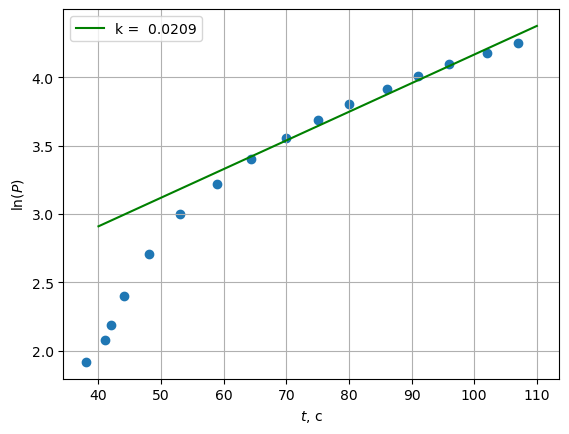

In [10]:
fig, ax = plt.subplots()
#plt.errorbar(x, y, yerr=dy, xerr=dx, fmt='-', ecolor='red')
#ax.plot(x, y, 'r-')
plt.scatter(x, y, marker='o')

model1 = np.poly1d(np.polyfit(x[6::], y[6::], 1))

polyline = np.linspace(40, 110)
plt.plot(polyline, model1(polyline), color = 'green', label="k = {: .4f}".format(round(model1.c[0], 4)))


#ax.set_title('График зависимости $ln(U)(t)$')
plt.grid()

plt.ylabel('$\ln (P)$')
plt.xlabel('$t$, с')

plt.legend()
print (model1)

plt.show()
#plt.savefig('plot1.png')

In [11]:
W = model1.c[0] * Vall
W * 10 ** 6

71.88755466809415

In [12]:
x = tsW2
y = [np.log(p) for p in PsW2]

 
0.02022 x + 2.612


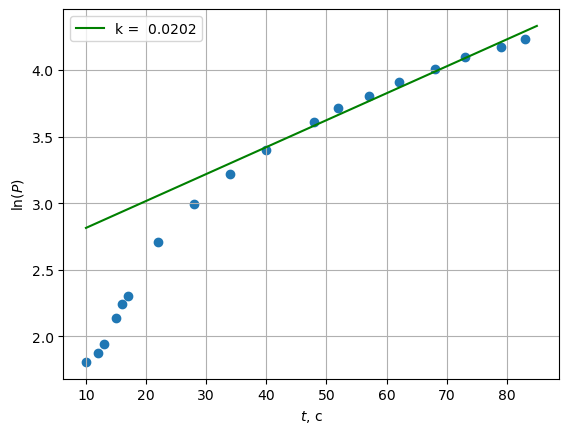

In [13]:
fig, ax = plt.subplots()
#plt.errorbar(xh, yh, yerr=dy, xerr=dx, fmt='-', ecolor='red')
#ax.plot(x, y, 'r-')
plt.scatter(x, y, marker='o')

model1 = np.poly1d(np.polyfit(x[8::], y[8::], 1))

polyline = np.linspace(10, 85)
plt.plot(polyline, model1(polyline), color = 'green', label="k = {: .4f}".format(round(model1.c[0], 4)))


#ax.set_title('График зависимости $ln(U)(t)$')
plt.grid()

plt.ylabel('$\ln (P)$')
plt.xlabel('$t$, с')

plt.legend()
print (model1)

plt.show()
#plt.savefig('plot1.png')

In [14]:
W = model1.c[0] * Vall
W * 10 ** 6

69.38897503359408

#### b) (Bettering)

In [15]:
ts = [54, 55, 56, 57, 58, 60, 62, 67, 70, 72, 73, 75, 79, 84, 90.33, 96, 107] 
tsB1 = np.array([t + 60 for t in ts])
PsB1 = np.array([70, 60, 56, 48, 36, 27, 19, 11, 9.0, 8.4, 7.9, 7.5, 7, 6.7, 6.5, 6.4, 6.3])

ts2 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 42, 44, 45, 46, 47, 48, 47, 
       51, 54, 55, 58, 63, 68, 74, 82]
tsB2 = np.array([t + 60 for t in ts2])
PsB2 = np.array([70, 64, 56, 46, 40, 33, 28, 23, 20, 15, 12, 10, 9.4, 8.9, 8.4, 8, 7.7, 
       7.3, 6.8, 6.7, 6.5, 6.3, 6.2, 6.1, 6])

In [16]:
x = tsB1
y = [np.log(p) for p in PsB1]

 
-0.135 x + 19.59


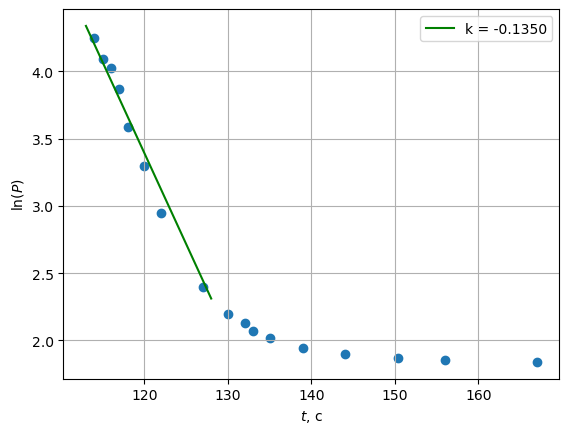

In [17]:
fig, ax = plt.subplots()
#plt.errorbar(xh, yh, yerr=dy, xerr=dx, fmt='-', ecolor='red')
#ax.plot(x, y, 'r-')
plt.scatter(x, y, marker='o')

model1 = np.poly1d(np.polyfit(x[:9:], y[:9:], 1))

polyline = np.linspace(113, 128)
plt.plot(polyline, model1(polyline), color = 'green', label="k = {: .4f}".format(round(model1.c[0], 4)))


#ax.set_title('График зависимости $ln(U)(t)$')
plt.grid()

plt.ylabel('$\ln (P)$')
plt.xlabel('$t$, с')

plt.legend()
print (model1)

#plt.show()
plt.savefig('plotBetter1.png')

In [18]:
W = - model1.c[0] * Vall
W * 10 ** 6

463.2868227032356

In [19]:
x = tsB2
y = [np.log(p) for p in PsB2]

 
-0.1369 x + 16.53


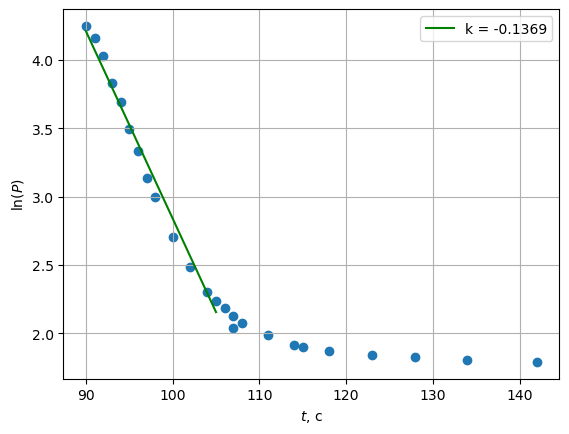

In [20]:
fig, ax = plt.subplots()
#plt.errorbar(xh, yh, yerr=dy, xerr=dx, fmt='-', ecolor='red')
#ax.plot(x, y, 'r-')
plt.scatter(x, y, marker='o')

model1 = np.poly1d(np.polyfit(x[:14:], y[:14:], 1))

polyline = np.linspace(90, 105)
plt.plot(polyline, model1(polyline), color = 'green', label="k = {: .4f}".format(round(model1.c[0], 4)))


#ax.set_title('График зависимости $ln(U)(t)$')
plt.grid()

plt.ylabel('$\ln (P)$')
plt.xlabel('$t$, с')

plt.legend()
print (model1)

#plt.show()
plt.savefig('plotBetter2.png')

In [21]:
W = - model1.c[0] * Vall
W * 10 ** 6

469.8108375735046

#### PLOTS TOGETHER

In [22]:
time1 = []
time1 = np.concatenate((tsW1, tsB1))
press1 = []
press1 = np.concatenate((PsW1, PsB1))

time2 = []
time2 = np.concatenate((tsW2, tsB2))
press2 = []
press2 = np.concatenate((PsW2, PsB2))

In [23]:
X1 = time1
Y1 = press1

X2 = time2
Y2 = press2

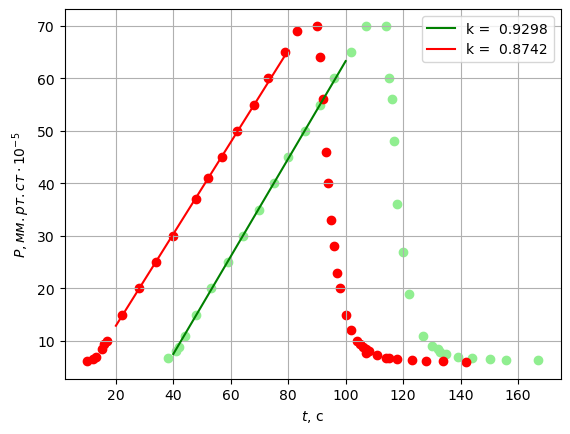

In [24]:
fig, ax = plt.subplots()
#plt.errorbar(xh, yh, yerr=dy, xerr=dx, fmt='-', ecolor='red')
#ax.plot(X1, Y1, 'g-', X2, Y2, 'r--')
plt.scatter(X1, Y1, marker='o', color='lightgreen')

plt.scatter(X2, Y2, marker='o', color='r')
#ax.set_title('График зависимости $ln(U)(t)$')
plt.grid()

model1 = np.poly1d(np.polyfit(X1[4:15:], Y1[4:15:], 1))
polyline = np.linspace(40, 100)
plt.plot(polyline, model1(polyline), color = 'green', label="k = {: .4f}".format(round(model1.c[0], 4)))


model2 = np.poly1d(np.polyfit(X2[6:15:], Y2[6:15:], 1))
polyline = np.linspace(20, 80)
plt.plot(polyline, model2(polyline), color = 'red', label="k = {: .4f}".format(round(model2.c[0], 4)))


plt.ylabel('$P, мм.рт.ст \cdot 10^{-5}$')
plt.xlabel('$t$, с')

plt.legend()

#plt.show()
plt.savefig('ALLPLOT.png')

#### 19 part (find Qn)

In [25]:
k = np.average([model1.c[0], model2.c[0]]) * koefP * 10 ** (-5)
k

0.0012024182622079503

In [26]:
Qsum = Vhighvacuum * k

In [27]:
Qn = Ppr * W - Qsum
Ppr * W * 10 ** 6, Qsum * 10 ** 6, Qn

(4.070676002155631, 1.5396150432465845, 2.5310609589090466e-06)

#### 20 part

In [28]:
r = 0.4 * 10**(-3)
L = 10.8 * 10 ** (-2)
rho = 885
T = 303
mu = 0.029

In [29]:
Ctr = (4 * r**3 / (3 * L)) * (2 * np.pi * R * T / mu)**0.5

#### 21 part

In [30]:
Pust = 1.3 * 10 ** (-4) * koefP
Pforv = 3.8 * 10 ** (-3) * koefP
Ppr

0.0086645

#### 22 part

In [35]:
q = (4 * r**3 / 3) * ((Pforv) / L) * (2 * np.pi * R * T / mu)**0.5
q, Pust, Pforv, Ppr

(2.9561159349348827e-07, 0.017329000000000004, 0.50654, 0.0086645)

In [34]:
W = q / (Pust - Ppr)
W * 10 ** (6)

34.11755940833149